In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import DataGenerator, DataPlotter
from sklearn.metrics import accuracy_score
np.random.seed(42)


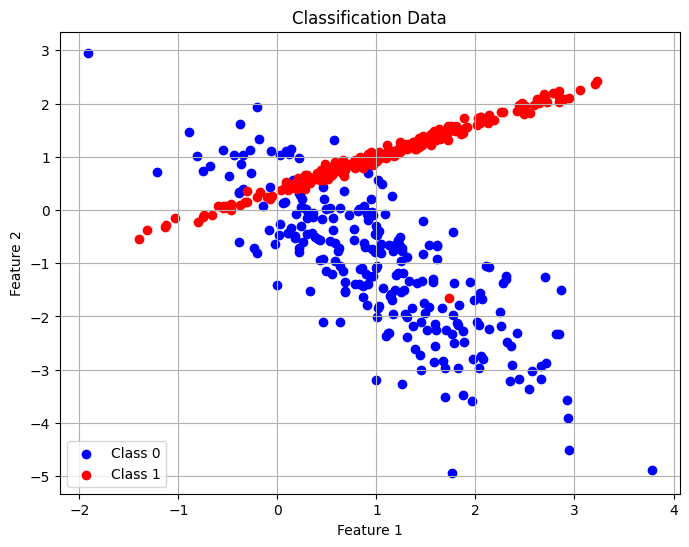

In [2]:
num_samples = 500
num_features = 2

type = "regression"
type = "classification"

if type == "classification":
    num_classes = 2

gen = DataGenerator(num_samples, num_features, num_classes)
X,y = gen.get_data(type=type)
initial = X.copy()

plotter = DataPlotter()
plotter.plot_data(X,y, type, num_classes)

In [3]:
# https://stats.stackexchange.com/questions/142565/computational-complexity-for-linear-discriminant-analysis
num_samples, num_features = X.shape # data matrix
p = 2 # num of components
P = np.random.random((p,num_features)) # projection matrix

# compute mean vector for each class
classes = np.unique(y)
num_classes = len(classes)
Mc = np.zeros((num_classes, num_features))
for i in range(num_classes):
    Xc = X[y == classes[i]]
    Mc[i] = np.mean(Xc, axis = 0)
print("Mc: ", Mc)

# compute total mean vector
M = np.mean(X, axis = 0)
print("M: ", M)

# compute within-class scatter and between-class scatter
Sw = np.zeros((num_features, num_features))
Sb = np.zeros((num_features, num_features))
sum = 0
for c in range(num_classes):
    Xc = X[y == classes[c]]
    mc = Mc[c].reshape(-1,1)
    Nc, _ = Xc.shape # num_samples for the class
    for j in range(Nc):
        xc_j = Xc[j]
        Sw += (xc_j - mc).T @ (xc_j - mc)
        Sb += (mc - M).T @ (mc - M)
print("Sw: ", Sw)        
print("Sb: ", Sb)   

# eigen-decomposition
V, D = np.linalg.eig(np.linalg.inv(Sw) @ Sb) # eigenvalues, eigenvectors
print("V,D: ", V, D)

# get the projection matrix
P = D[0:p]
print("P: ", P)



Mc:  [[ 1.00242557 -1.01874336]
 [ 1.04085299  1.01560958]]
M:  [1.02171613 0.00250181]
Sw:  [[1799.76478041 -201.47633781]
 [-201.47633781 2020.80216501]]
Sb:  [[1036.89920066  517.50028746]
 [ 517.50028746 1036.89920066]]
V,D:  [0.91387246 0.24564788] [[ 0.75580521 -0.68999018]
 [ 0.65479652  0.72381873]]
P:  [[ 0.75580521 -0.68999018]
 [ 0.65479652  0.72381873]]


In [4]:
# project data, prediciton
def predict(X):
    return np.argmax(X @ P.T, axis = 1)

predicitons = predict(X)
print(accuracy_score(y, predicitons))
# plotter.plot_data(X, predicitons)


0.88


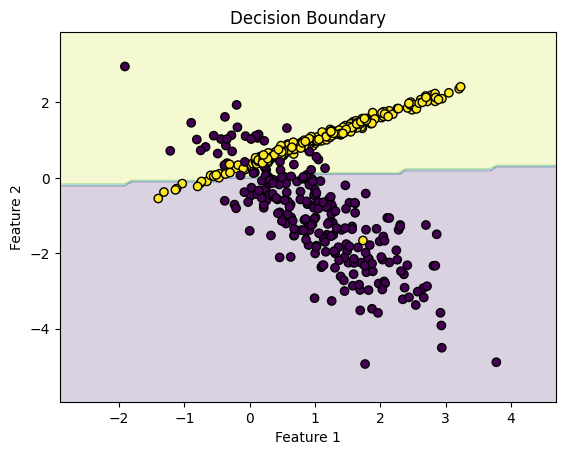

In [5]:
def plot_decision_boundary_numerically(predict_func, X, y, title = "decision boundary"):
    # Create meshgrid for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict classes for each point in meshgrid
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_func(Z)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary_numerically(predict, X, y, title=f"Decision Boundary")

